IMPORT THE LIBRARIES




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as pt
import seaborn as sns
import warnings

UPLOADING THE DATASET


In [ ]:
from google.colab import files 
upload= files.upload()


Saving water_dataX.csv to water_dataX.csv


READ THE DATASET

In [29]:
data= pd.read_csv('water_dataX.csv', header= 0,
                        encoding= 'unicode_escape')

In [30]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


HANDLING MISSING VALUES

In [31]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

STATION CODE
False    1991
Name: STATION CODE, dtype: int64

LOCATIONS
False    1991
Name: LOCATIONS, dtype: int64

STATE
False    1991
Name: STATE, dtype: int64

Temp
False    1991
Name: Temp, dtype: int64

D.O. (mg/l)
False    1991
Name: D.O. (mg/l), dtype: int64

PH
False    1991
Name: PH, dtype: int64

CONDUCTIVITY (µmhos/cm)
False    1991
Name: CONDUCTIVITY (µmhos/cm), dtype: int64

B.O.D. (mg/l)
False    1991
Name: B.O.D. (mg/l), dtype: int64

NITRATENAN N+ NITRITENANN (mg/l)
False    1991
Name: NITRATENAN N+ NITRITENANN (mg/l), dtype: int64

FECAL COLIFORM (MPN/100ml)
False    1991
Name: FECAL COLIFORM (MPN/100ml), dtype: int64

TOTAL COLIFORM (MPN/100ml)Mean
False    1991
Name: TOTAL COLIFORM (MPN/100ml)Mean, dtype: int64

year
False    1991
Name: year, dtype: int64



ANALYSING THE DATA

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [38]:
data.shape

(1991, 12)

In [39]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [40]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [42]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)     object
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [43]:
data=data.rename(columns = {'D.O. (mg/l)':'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns = {'B.O.D. (mg/l)':'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l) ':'na'})
data=data.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns = {'STATION CODE':'station'})
data=data.rename(columns = {'LOCATIONS':'location'})
data=data.rename(columns = {'STATE':'state'})
data=data.rename(columns = {'PH':'ph'})

In [44]:
data.head()

,station,location,state,Temp,do,ph,co,bod,NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500.0,2014


WATER QUALITY INDEX CALCULATION


In [45]:
data['npH']=data.ph.apply(lambda x:(100 if (8.5>=x>=7)
                               else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                   else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                       else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                           else 0)))))

In [46]:
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)
                               else(80 if (6>=x>=5.1)
                                   else(60 if (5>=x>=4.1)
                                       else(40 if (4>=x>=3)
                                            else 0)))))

In [47]:
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)
                               else(80 if (50>=x>=5)
                                   else(60 if (500>=x>=50)
                                       else(40 if (10000>=x>=500)
                                           else 0)))))

In [48]:
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)
                               else(80 if (6>=x>=3)
                                   else(60 if (80>=x>=6)
                                       else(40 if (125>=x>=80)
                                           else 0)))))

In [49]:
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)
                               else(80 if (150>=x>=75)
                                   else(60 if (225>=x>=150)
                                       else(40 if (300>=x>=225)
                                           else 0)))))

In [50]:
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wco
data

,station,location,state,Temp,do,ph,co,bod,NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),...,ndo,nco,nbdo,nec,wph,wdo,wbdo,wec,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,...,100,80,0,60,16.5,28.10,0.00,0.54,22.48,67.62
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953,...,80,40,100,60,16.5,22.48,23.40,0.54,11.24,74.16
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,...,100,40,100,60,13.2,28.10,23.40,0.54,11.24,76.48
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,...,80,40,80,100,13.2,22.48,18.72,0.90,11.24,66.54
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,...,80,40,100,80,16.5,22.48,23.40,0.72,11.24,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,...,100,60,100,100,0.0,28.10,23.40,0.90,16.86,69.26
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,...,100,60,100,100,0.0,28.10,23.40,0.90,16.86,69.26
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NAN,NAN,...,100,40,100,100,0.0,28.10,23.40,0.90,11.24,63.64
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NAN,NAN,...,100,40,100,100,0.0,28.10,23.40,0.90,11.24,63.64


In [51]:
average=data.groupby('year')['wqi'].mean()
average.head()

year
2003    62.960682
2004    58.490000
2005    69.664370
2006    68.643238
2007    70.262333
Name: wqi, dtype: float64

DATA VISUALIZATION

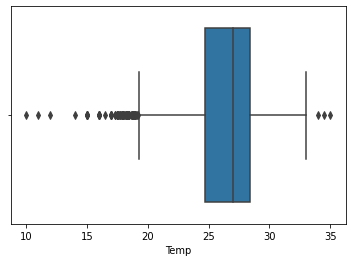

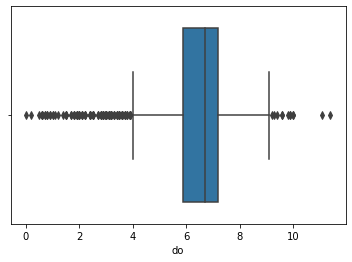

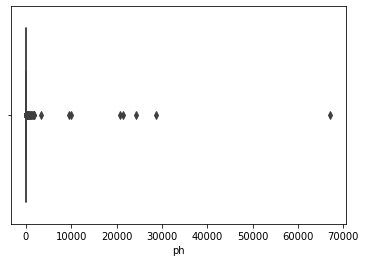

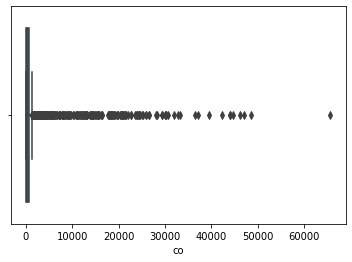

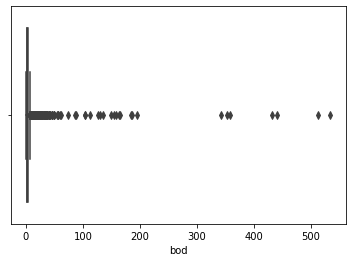

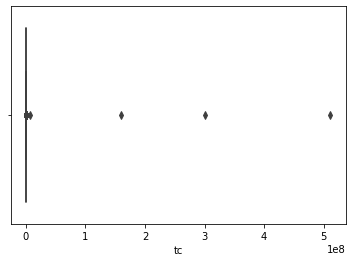

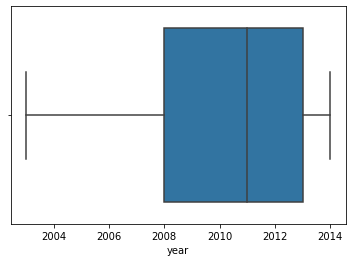

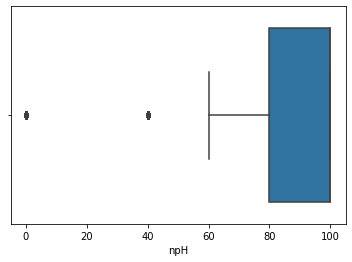

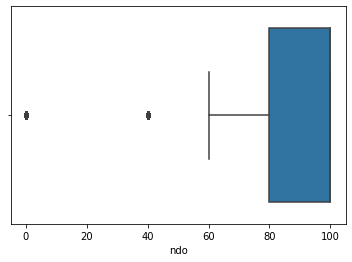

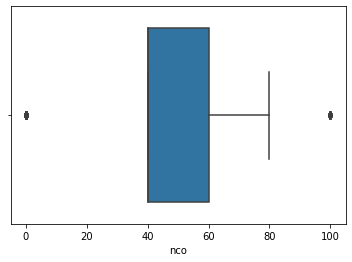

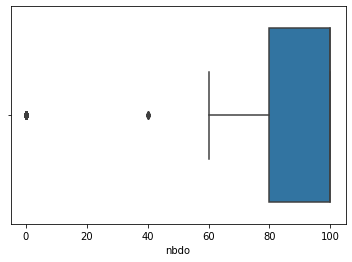

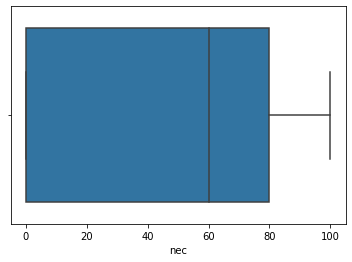

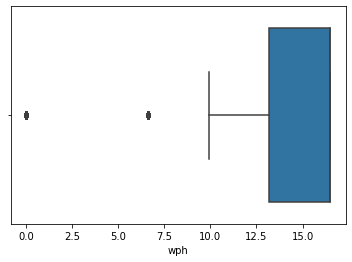

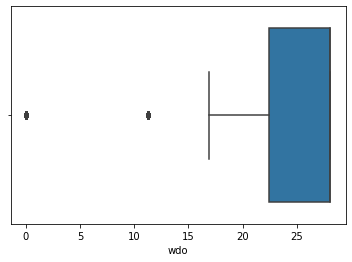

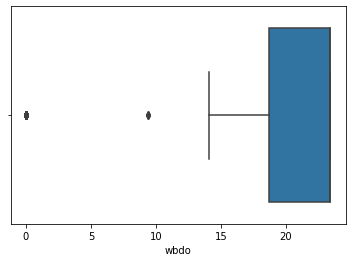

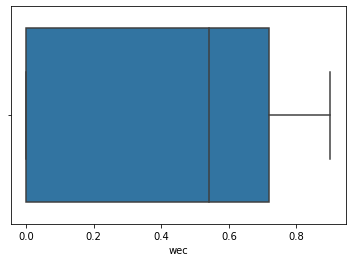

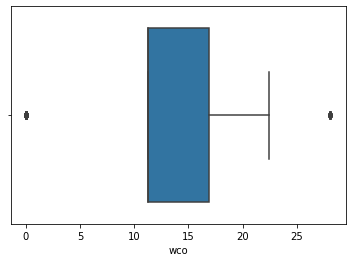

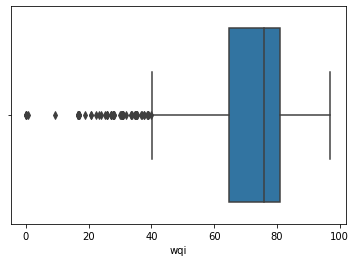

In [52]:
for col in data.columns:
    if data.dtypes[col]=='float64'or data.dtypes[col]=='int64':
        sns.boxplot(x=data[col]).set(xlabel=col)
        plt.show()

BIVARIATE 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


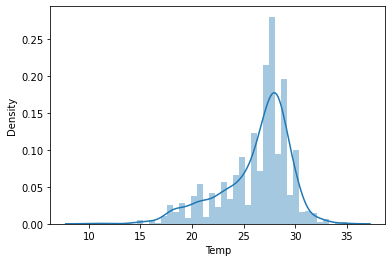

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


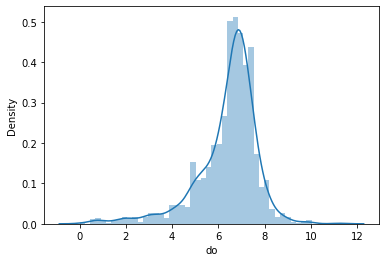

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


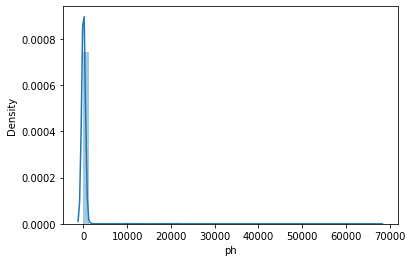

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


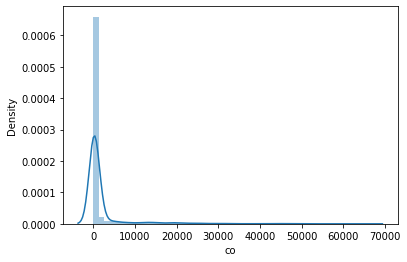

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


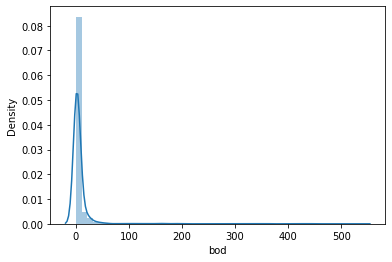

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


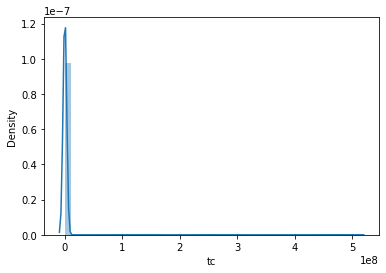

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


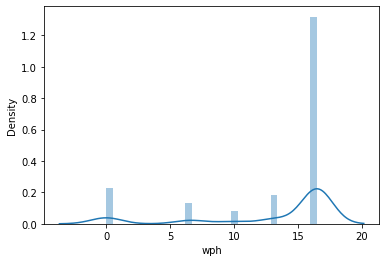

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


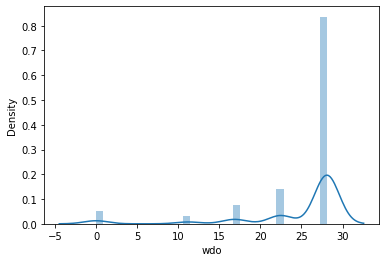

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


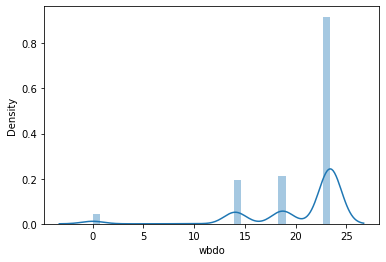

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


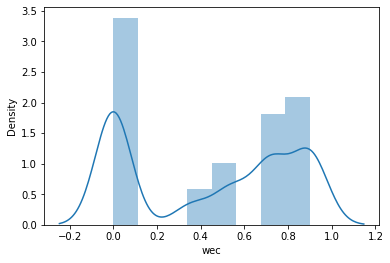

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


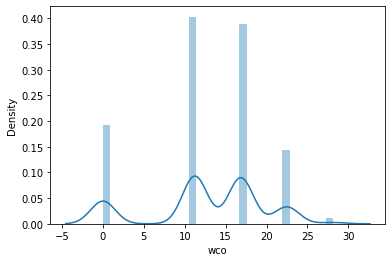

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


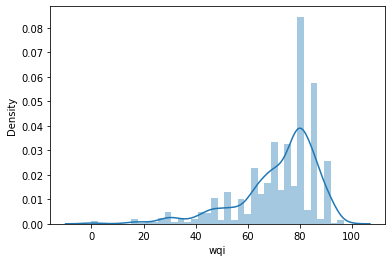

In [53]:
for col in data.columns:
    if data.dtypes[col]=='float64':
        sns.distplot(x=data[col]).set(xlabel=col)
        plt.show()

MULTIVARIATE

In [54]:
data.corr()

,Temp,do,ph,co,bod,tc,year,npH,ndo,nco,nbdo,nec,wph,wdo,wbdo,wec,wco,wqi
Temp,1.000000,0.026269,0.017262,0.145811,-0.049795,0.009165,-0.010100,-0.087397,0.065064,0.048150,0.129592,0.071769,-0.087397,0.065064,0.129592,0.071769,0.048150,0.064282
do,0.026269,1.000000,0.034825,-0.167928,-0.281415,-0.148194,-0.069588,-0.050493,0.892362,0.331985,0.371934,0.376354,-0.050493,0.892362,0.371934,0.376354,0.331985,0.673960
ph,0.017262,0.034825,1.000000,-0.017917,0.041545,-0.002123,-0.128758,-0.135050,0.019126,-0.017215,-0.013244,0.067564,-0.135050,0.019126,-0.013244,0.067564,-0.017215,-0.053056
co,0.145811,-0.167928,-0.017917,1.000000,0.108166,0.003877,0.026944,0.115331,-0.132995,-0.068699,-0.186612,-0.364868,0.115331,-0.132995,-0.186612,-0.364868,-0.068699,-0.120141
bod,-0.049795,-0.281415,0.041545,0.108166,1.000000,0.190468,-0.058975,0.030374,-0.334613,-0.139793,-0.605805,-0.180324,0.030374,-0.334613,-0.605805,-0.180324,-0.139793,-0.390590
tc,0.009165,-0.148194,-0.002123,0.003877,0.190468,1.000000,0.037204,0.021093,-0.138066,-0.082496,-0.152604,-0.046803,0.021093,-0.138066,-0.152604,-0.046803,-0.082496,-0.141669
year,-0.010100,-0.069588,-0.128758,0.026944,-0.058975,0.037204,1.000000,0.358773,-0.040071,0.082248,0.037138,-0.030894,0.358773,-0.040071,0.037138,-0.030894,0.082248,0.163226
npH,-0.087397,-0.050493,-0.135050,0.115331,0.030374,0.021093,0.358773,1.000000,-0.011687,-0.061682,-0.111370,-0.287915,1.000000,-0.011687,-0.111370,-0.287915,-0.061682,0.290403
ndo,0.065064,0.892362,0.019126,-0.132995,-0.334613,-0.138066,-0.040071,-0.011687,1.000000,0.314105,0.443100,0.351455,-0.011687,1.000000,0.443100,0.351455,0.314105,0.744658
nco,0.048150,0.331985,-0.017215,-0.068699,-0.139793,-0.082496,0.082248,-0.061682,0.314105,1.000000,0.384529,0.288459,-0.061682,0.314105,0.384529,0.288459,1.000000,0.711245


SPLITTING THE DATA

In [56]:
x=data.iloc[:,0:7].values
y=data.iloc[:,7:].values
x.shape


(1991, 16)

In [57]:
y.shape

(1991, 16)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape
y_train.shape

(1592, 16)

In [62]:
x_test.shape


(399, 7)

In [63]:
y_test.shape

(399, 16)